In [21]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [22]:
# parameters
c_max = 1.5
c_min = -1.5
n_train = 10000
n_valid = 1000

# function to fit
def f(x, y):
    return np.sin(x*x + y*y)

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(c_min, c_max, n_train)
x_valid = np.random.uniform(c_min, c_max, n_valid)
y_train = np.random.uniform(c_min, c_max, n_train)
y_valid = np.random.uniform(c_min, c_max, n_valid)
r_valid = np.sqrt(x_valid * x_valid + y_valid * y_valid)

vec_train = np.column_stack((x_train, y_train))
vec_valid = np.column_stack((x_valid, y_valid))

z_target = f(x_valid, y_valid) # ideal (target) function

sigma = 0.25 # -1 < sin < 1, we use a smaller noise
z_train = np.random.normal(f(x_train, y_train), sigma)
z_valid = np.random.normal(f(x_valid, y_valid), sigma)

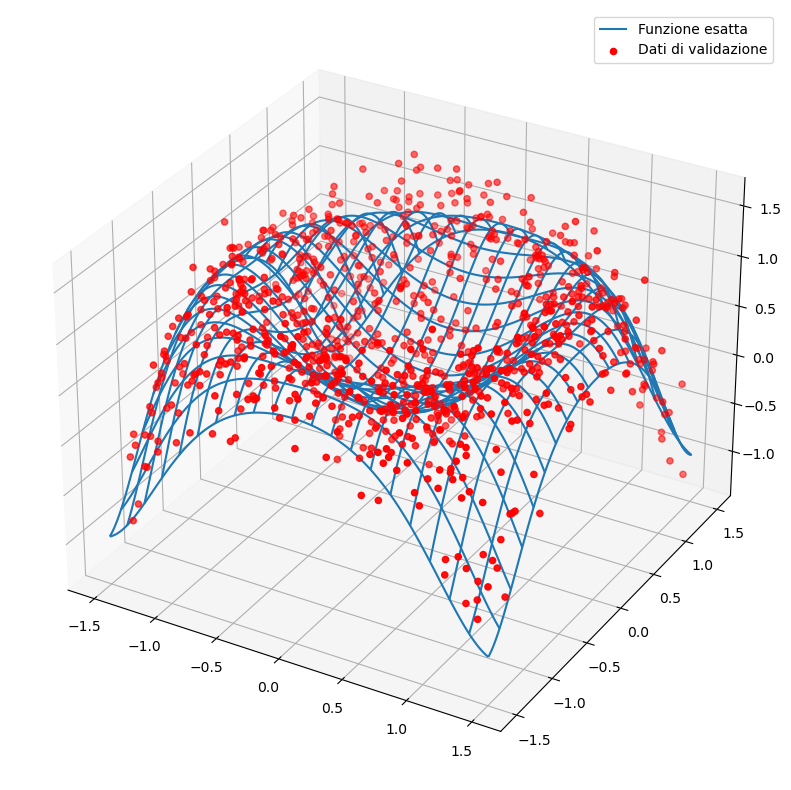

In [23]:
# plot validation and target dataset
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection='3d')

x_grid, y_grid = np.linspace(c_min, c_max, n_valid), np.linspace(c_min, c_max, n_valid)
x_grid, y_grid = np.meshgrid(x_grid, y_grid)
ax.plot_wireframe(x_grid, y_grid, f(x_grid, y_grid), label='Funzione esatta', rstride = 50, cstride = 50)
ax.scatter(x_valid, y_valid, z_valid, color='r', label='Dati di validazione')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(40, input_shape=(2,), activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='logcosh', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 40)                120       
                                                                 
 dense_11 (Dense)            (None, 20)                820       
                                                                 
 dense_12 (Dense)            (None, 10)                210       
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,271
Trainable params: 1,271
Non-trainable params: 0
_________________________________________________________________


In [25]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=vec_train, y=z_train, 
          batch_size=32, epochs=30,
          shuffle=True,
          validation_data=(vec_valid, z_valid))

Epoch 1/30
313/313 [==============================] - 2s 4ms/step - loss: 0.1055 - mse: 0.2340 - val_loss: 0.0892 - val_mse: 0.1955
Epoch 2/30
313/313 [==============================] - 1s 3ms/step - loss: 0.0802 - mse: 0.1757 - val_loss: 0.0618 - val_mse: 0.1337
Epoch 3/30
313/313 [==============================] - 1s 3ms/step - loss: 0.0586 - mse: 0.1269 - val_loss: 0.0530 - val_mse: 0.1137
Epoch 4/30
313/313 [==============================] - 1s 3ms/step - loss: 0.0538 - mse: 0.1156 - val_loss: 0.0498 - val_mse: 0.1061
Epoch 5/30
313/313 [==============================] - 1s 3ms/step - loss: 0.0503 - mse: 0.1073 - val_loss: 0.0459 - val_mse: 0.0973
Epoch 6/30
313/313 [==============================] - 1s 3ms/step - loss: 0.0471 - mse: 0.0996 - val_loss: 0.0427 - val_mse: 0.0897
Epoch 7/30
313/313 [==============================] - 1s 3ms/step - loss: 0.0431 - mse: 0.0903 - val_loss: 0.0389 - val_mse: 0.0811
Epoch 8/30
313/313 [==============================] - 1s 3ms/step - loss: 0.

In [26]:
# evaluate model
score = model.evaluate(vec_valid, z_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 2ms/step - loss: 0.0306 - mse: 0.0629

Test loss: 0.030554287135601044
Test accuracy: 0.06289826333522797


In [27]:
# evaluate model with the exact curve
score = model.evaluate(vec_valid, z_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0021

Test loss: 0.0010603845585137606
Test accuracy: 0.0021232934668660164


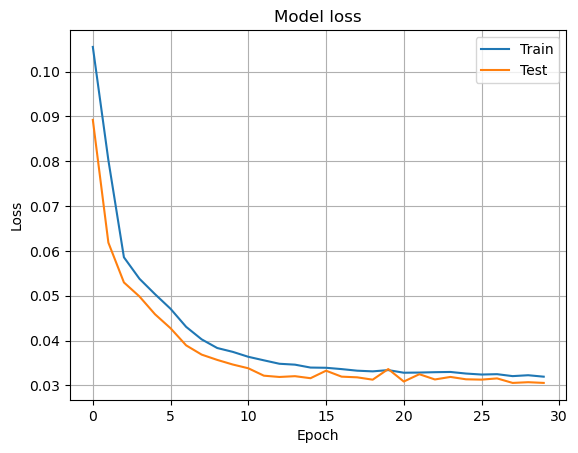

In [28]:
# look into training history
# plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

16/16 [==============================] - 0s 5ms/step


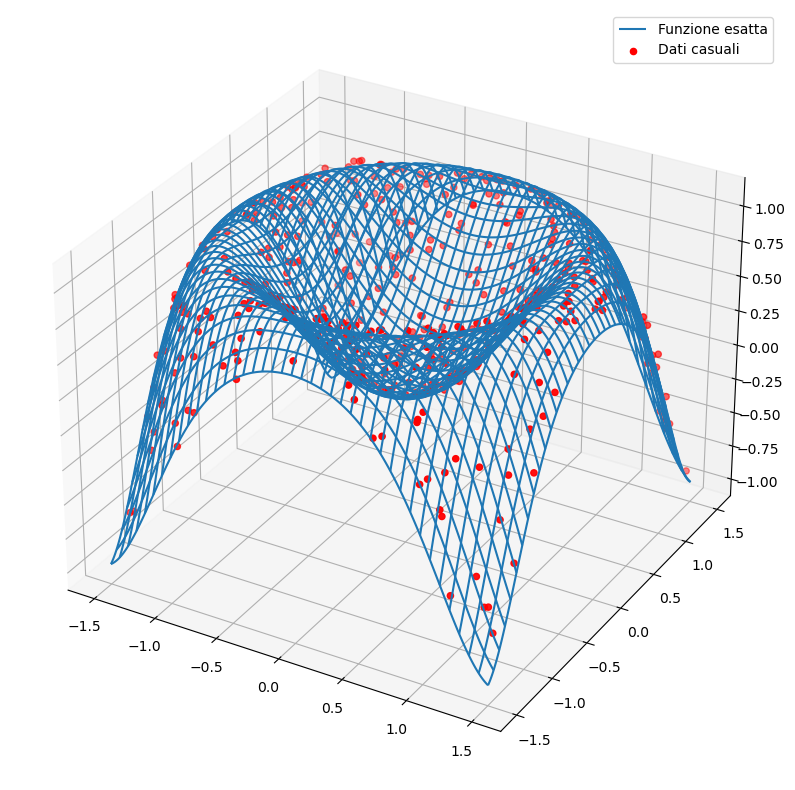

In [33]:
# fit new random data
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection='3d')

x_grid, y_grid = np.linspace(c_min, c_max, n_valid), np.linspace(c_min, c_max, n_valid)
x_grid, y_grid = np.meshgrid(x_grid, y_grid)
ax.plot_wireframe(x_grid, y_grid, f(x_grid, y_grid), label='Funzione esatta', rstride = 25, cstride = 25)

x_predicted = np.random.uniform(c_min, c_max, 500)
y_predicted = np.random.uniform(c_min, c_max, 500)
z_predicted = model.predict(np.column_stack((x_predicted, y_predicted)))
ax.scatter(x_predicted, y_predicted, z_predicted, color='r', label='Dati casuali')
plt.legend()
plt.grid(True)
plt.show()

16/16 [==============================] - 0s 4ms/step


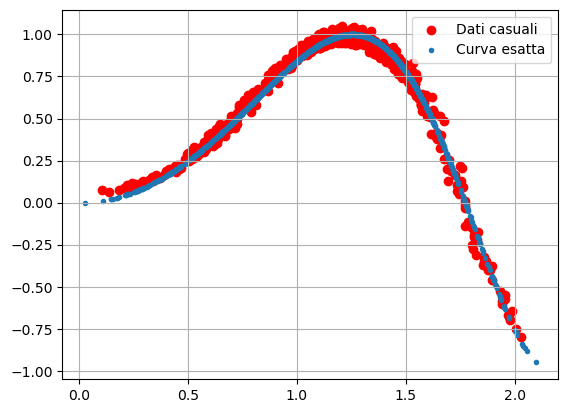

In [34]:
# fit new random data
x_predicted = np.random.uniform(c_min, c_max, 500)
y_predicted = np.random.uniform(c_min, c_max, 500)
z_predicted = model.predict(np.column_stack((x_predicted, y_predicted)))
r_predicted = np.sqrt(x_predicted * x_predicted + y_predicted * y_predicted)
plt.scatter(r_predicted, z_predicted, color='r', label='Dati casuali')
plt.scatter(r_valid, z_target, s = 9, label = 'Curva esatta')
plt.legend()
plt.grid(True)
plt.show()